# Zadanie domowe 6 - szachy

## Import biliotek, odczyt z plików i formatowanie 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("", header=None, names=['bialy_krol_kolumna', 'bialy_krol_rząd', 'biala_wieza_kolumna', 'biala_wieza_rząd','czarny_krol_kolumna', 'czarny_krol_rząd', 'ruchy_bialy_koniec'])
df

,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


In [65]:
df.loc[:,['bialy_krol_kolumna','czarny_krol_kolumna','biala_wieza_kolumna']]=df.loc[:,['bialy_krol_kolumna','czarny_krol_kolumna','biala_wieza_kolumna']].applymap(lambda x: ord(x)-ord('a')+1)
df

C:\Users\wiole\AppData\Local\Temp\ipykernel_2984\2535782921.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[:,['bialy_krol_kolumna','czarny_krol_kolumna','biala_wieza_kolumna']]=df.loc[:,['bialy_krol_kolumna','czarny_krol_kolumna','biala_wieza_kolumna']].applymap(lambda x: ord(x)-ord('a')+1)


,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw
...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,sixteen
28052,2,1,7,7,5,6,sixteen
28053,2,1,7,7,5,7,sixteen
28054,2,1,7,7,6,5,sixteen


In [66]:
mapa_wartosci = {
    'draw': -1,
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
    'thirteen': 13,
    'fourteen': 14,
    'fifteen': 15,
    'sixteen': 16
}

In [67]:
df.ruchy_bialy_koniec=df.ruchy_bialy_koniec.map(mapa_wartosci)
df

,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec
0,1,1,2,3,3,2,-1
1,1,1,3,1,3,2,-1
2,1,1,3,1,4,1,-1
3,1,1,3,1,4,2,-1
4,1,1,3,2,3,1,-1
...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16
28052,2,1,7,7,5,6,16
28053,2,1,7,7,5,7,16
28054,2,1,7,7,6,5,16


## Zadanie 1

In [68]:
df2= df.loc[df.loc[:,'ruchy_bialy_koniec']==0,['czarny_krol_rząd','czarny_krol_kolumna']]
szachownica1= pd.crosstab( df2.czarny_krol_rząd,df2.czarny_krol_kolumna)
szachownica1 = szachownica1.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
lit=['a','b','c','d','e','f','g','h']
szachownica1

czarny_krol_kolumna,1,2,3,4,5,6,7,8
czarny_krol_rząd,,,,,,,,
1,12,0,5,5,0,0,0,0
2,5,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0


In [69]:
df3= df.loc[df.loc[:,'ruchy_bialy_koniec']==-1,['czarny_krol_kolumna','czarny_krol_rząd']]
szachownica2= pd.crosstab( df3.czarny_krol_rząd,df3.czarny_krol_kolumna)
szachownica2 = szachownica2.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
szachownica2

czarny_krol_kolumna,1,2,3,4,5,6,7,8
czarny_krol_rząd,,,,,,,,
1,23,18,13,21,33,45,50,30
2,20,21,12,24,47,72,80,50
3,25,29,21,32,48,72,80,50
4,29,43,35,44,59,74,80,50
5,30,47,46,45,60,77,80,50
6,30,48,48,48,48,67,80,50
7,30,48,48,48,48,48,68,50
8,18,30,30,30,30,30,30,26


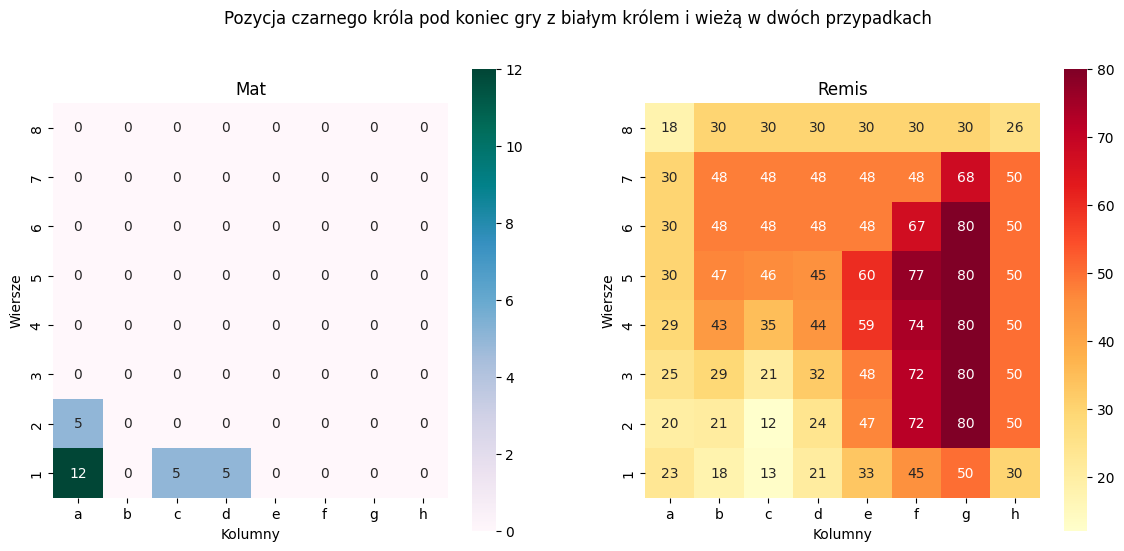

In [70]:
fig, axes = plt.subplots(1, 2,figsize=(14, 6))
fig.suptitle("Pozycja czarnego króla pod koniec gry z białym królem i wieżą w dwóch przypadkach")
sns.heatmap(szachownica1, ax=axes[0],annot=True, cmap='PuBuGn', fmt='d',xticklabels=lit, square=True)
axes[0].set_title('Mat')   
axes[0].set_xlabel('Kolumny')
axes[0].set_ylabel('Wiersze')

sns.heatmap(szachownica2, ax=axes[1],annot=True, cmap='YlOrRd', fmt='d',xticklabels=lit, square=True)
axes[1].set_title('Remis')
axes[1].set_xlabel('Kolumny')

axes[1].set_ylabel('Wiersze')

axes[1].invert_yaxis() 
axes[0].invert_yaxis() 


Jak widać było mało matów, rozdzieliłam skale kolorystyczne by były lepiej widoczne. Większość działa się gdy czarny król był w lewym dolnym rogu, na krańcu planszy. Za to remisy działy się głównie w po prawe w odległości 1 od skraju planszy.

## Zadanie 2

In [71]:
dfk= df[df['ruchy_bialy_koniec'] != -1].copy()
dx = (dfk['bialy_krol_kolumna'] - dfk['czarny_krol_kolumna']).abs()
dy = (dfk['bialy_krol_rząd'] - dfk['czarny_krol_rząd']).abs()
dfk['Manhattan']=dx + dy
dfk['Euklides']=(dx**2 + dy**2).pow(0.5)
dfk['Czebyszew']=np.maximum(dx, dy)
dfk

,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec,Manhattan,Euklides,Czebyszew
2796,3,1,1,3,1,1,0,2,2.0,2
2797,3,1,1,4,1,1,0,2,2.0,2
2798,3,1,1,5,1,1,0,2,2.0,2
2799,3,1,1,6,1,1,0,2,2.0,2
2800,3,1,1,7,1,1,0,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,7,5.0,4
28052,2,1,7,7,5,6,16,8,5.830952,5
28053,2,1,7,7,5,7,16,9,6.708204,6
28054,2,1,7,7,6,5,16,8,5.656854,4


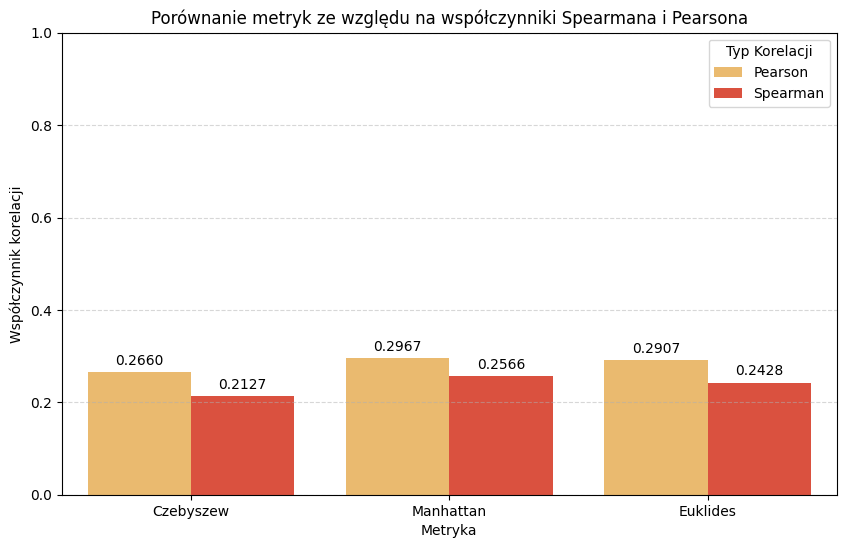

In [72]:
df5 = ['Czebyszew', 'Manhattan', 'Euklides', 'ruchy_bialy_koniec']
pearson = dfk[df5].corr(method='pearson')['ruchy_bialy_koniec'].drop('ruchy_bialy_koniec')
spearman = dfk[df5].corr(method='spearman')['ruchy_bialy_koniec'].drop('ruchy_bialy_koniec')
wyniki_raw = pd.DataFrame({
    'Metryka': pearson.index,
    'Pearson': pearson.values,
    'Spearman': spearman.values
})


wyniki = wyniki_raw.melt(id_vars='Metryka', var_name='Typ Korelacji', value_name='Wartość')

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=wyniki,
    x='Metryka',
    y='Wartość',
    hue='Typ Korelacji',
    palette='YlOrRd'
)

plt.title('Porównanie metryk ze względu na współczynniki Spearmana i Pearsona')
plt.ylabel('Współczynnik korelacji')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', padding=3)

plt.show()

Jak widać korelacja między zaproponowanymi metrykami, a liczbą kroków do końca jest bardzo słaba. Najlepszą z nich jest metryka Manhattan, która odzwierciedla ruch wieżą, nieznacznie gorsza jest metryka Euklidesowa.

## Zadanie 3

In [73]:
dfk

,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec,Manhattan,Euklides,Czebyszew
2796,3,1,1,3,1,1,0,2,2.0,2
2797,3,1,1,4,1,1,0,2,2.0,2
2798,3,1,1,5,1,1,0,2,2.0,2
2799,3,1,1,6,1,1,0,2,2.0,2
2800,3,1,1,7,1,1,0,2,2.0,2
...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,7,5.0,4
28052,2,1,7,7,5,6,16,8,5.830952,5
28053,2,1,7,7,5,7,16,9,6.708204,6
28054,2,1,7,7,6,5,16,8,5.656854,4


In [74]:
dfk['odleglosc_skraj']=np.minimum.reduce([
    dfk['czarny_krol_kolumna'] - 1,
    8 - dfk['czarny_krol_kolumna'],
    dfk['czarny_krol_rząd'] - 1,
    8 - dfk['czarny_krol_rząd']
])

dfk


,bialy_krol_kolumna,bialy_krol_rząd,biala_wieza_kolumna,biala_wieza_rząd,czarny_krol_kolumna,czarny_krol_rząd,ruchy_bialy_koniec,Manhattan,Euklides,Czebyszew,odleglosc_skraj
2796,3,1,1,3,1,1,0,2,2.0,2,0
2797,3,1,1,4,1,1,0,2,2.0,2,0
2798,3,1,1,5,1,1,0,2,2.0,2,0
2799,3,1,1,6,1,1,0,2,2.0,2,0
2800,3,1,1,7,1,1,0,2,2.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,7,5.0,4,3
28052,2,1,7,7,5,6,16,8,5.830952,5,2
28053,2,1,7,7,5,7,16,9,6.708204,6,1
28054,2,1,7,7,6,5,16,8,5.656854,4,2


Jeśli jest koło krawędzi to jego odległość to 0

In [75]:
dfk.odleglosc_skraj.unique()

array([0, 1, 2, 3], dtype=object)

In [76]:
szachownica3=pd.crosstab(dfk.ruchy_bialy_koniec, dfk.odleglosc_skraj)
szachownica3 = szachownica3.reindex(index=range(0, 17), columns=range(0, 8), fill_value=0)
szachownica3

odleglosc_skraj,0,1,2,3,4,5,6,7
ruchy_bialy_koniec,,,,,,,,
0,27,0,0,0,0,0,0,0
1,78,0,0,0,0,0,0,0
2,246,0,0,0,0,0,0,0
3,76,5,0,0,0,0,0,0
4,179,19,0,0,0,0,0,0
5,414,57,0,0,0,0,0,0
6,513,75,4,0,0,0,0,0
7,545,133,5,0,0,0,0,0
8,1079,343,11,0,0,0,0,0


Text(0.5, 23.52222222222222, 'odległość czarnego króla od skraju planszy')

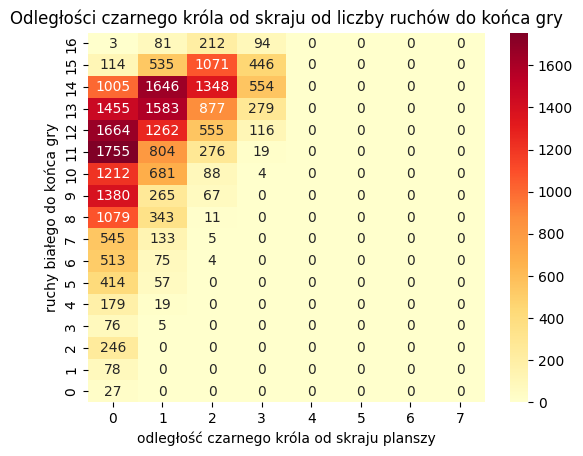

In [77]:
sns.heatmap(szachownica3,annot=True, cmap='YlOrRd', fmt='d')
plt.gca().invert_yaxis()  
plt.title("Odległości czarnego króla od skraju od liczby ruchów do końca gry")
plt.ylabel("ruchy białego do końca gry")
plt.xlabel("odległość czarnego króla od skraju planszy")

In [78]:
dfk.loc[:,['odleglosc_skraj','ruchy_bialy_koniec']].corr(method='spearman')['ruchy_bialy_koniec'].drop('ruchy_bialy_koniec')

odleglosc_skraj    0.55981
Name: ruchy_bialy_koniec, dtype: float64

In [79]:
dfk.loc[:,['odleglosc_skraj','ruchy_bialy_koniec']].corr(method='pearson')['ruchy_bialy_koniec'].drop('ruchy_bialy_koniec')

odleglosc_skraj    0.508439
Name: ruchy_bialy_koniec, dtype: float64

Na heatmapie widać pewną zależność liniową, co potwierdzają współczynniki Spearmana i Pearsona, chociaż jest ona słaba. Oznacza to, że do pewnego stopnia można wykorzystać informację o odległości od krawędzi do oszacowania liczby ruchów do końca.

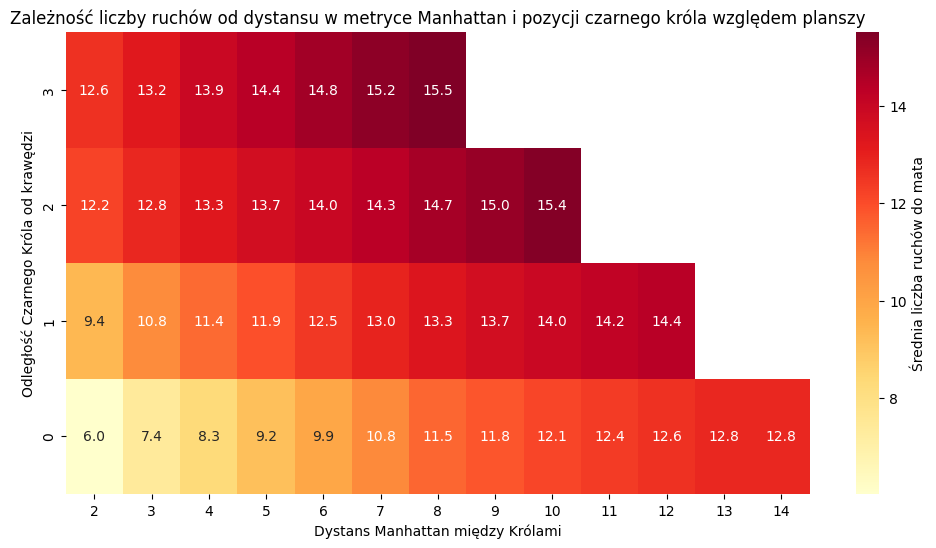

In [80]:
dfkk=dfk.copy()
pivot_table = dfkk.pivot_table(
    index='odleglosc_skraj', 
    columns='Manhattan', 
    values='ruchy_bialy_koniec', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Średnia liczba ruchów do mata'})

plt.title('Zależność liczby ruchów od dystansu w metryce Manhattan i pozycji czarnego króla względem planszy')
plt.ylabel('Odległość Czarnego Króla od krawędzi')
plt.xlabel('Dystans Manhattan między Królami')
plt.gca().invert_yaxis()
plt.show()

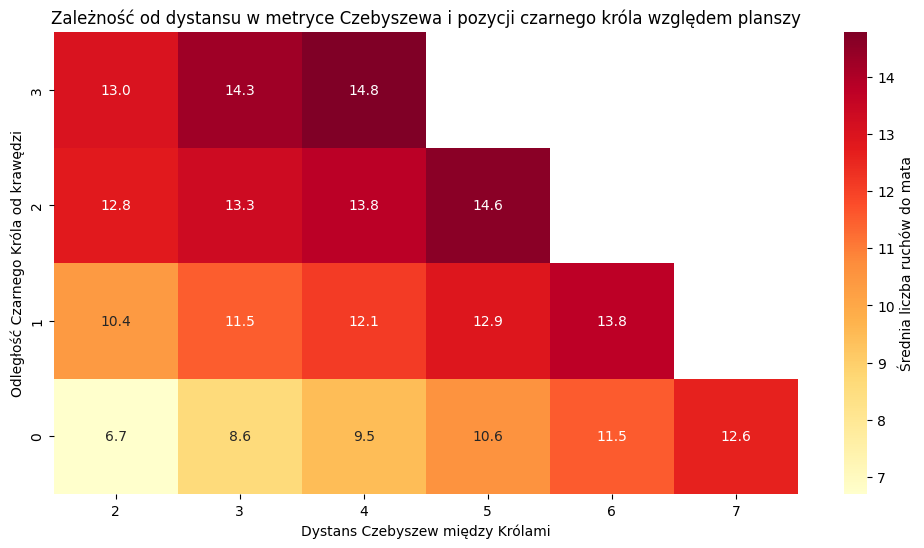

In [81]:
pivot_table1 = dfkk.pivot_table(
    index='odleglosc_skraj', 
    columns='Czebyszew', 
    values='ruchy_bialy_koniec', 
    aggfunc='mean'
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table1, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Średnia liczba ruchów do mata'})

plt.title('Zależność od dystansu w metryce Czebyszewa i pozycji czarnego króla względem planszy')
plt.ylabel('Odległość Czarnego Króla od krawędzi')
plt.xlabel('Dystans Czebyszew między Królami')
plt.gca().invert_yaxis()
plt.show()

W pbu powyższych przykładach widać pewną zależność. Wybraliśmy takie metryki, ponieważ Manhattan najlepiej wyszedł w poprzednim zadaniu, a Czebyszewa najbliżej odwzorowuje ruch króli w szachach.

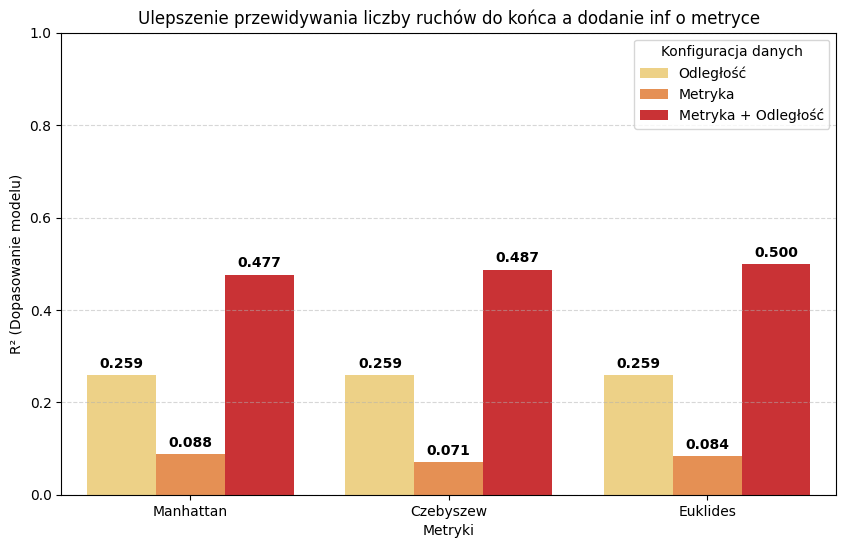

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df_model = dfk.copy()
y = df_model['ruchy_bialy_koniec']

def get_r2(features):
    X = df_model[features]
    model = LinearRegression().fit(X, y)
    return r2_score(y, model.predict(X))

r2_man_solo = get_r2(['Manhattan'])
r2_czeb_solo = get_r2(['Czebyszew'])
r2_odl_solo=get_r2(['odleglosc_skraj'])
r2_man_skr= get_r2(['Manhattan', 'odleglosc_skraj'])
r2_czeb_skr= get_r2(['Czebyszew', 'odleglosc_skraj'])
r2_euk_solo = get_r2(['Euklides'])
r2_euk_skr  = get_r2(['Euklides', 'odleglosc_skraj'])

dane_wykres = pd.DataFrame({
    'Metryki': [
        'Manhattan', 'Manhattan', 'Manhattan',
        'Czebyszew', 'Czebyszew', 'Czebyszew',
        'Euklides',  'Euklides',  'Euklides'
    ],
    'Wersja': [
        'Odległość', 'Metryka', 'Metryka + Odległość',
        'Odległość', 'Metryka', 'Metryka + Odległość',
        'Odległość', 'Metryka', 'Metryka + Odległość'
    ],
    'R2': [
        r2_odl_solo, r2_man_solo, r2_man_skr,
        r2_odl_solo, r2_czeb_solo, r2_czeb_skr,
        r2_odl_solo, r2_euk_solo, r2_euk_skr
    ]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=dane_wykres,
    x='Metryki',
    y='R2',
    hue='Wersja',
    palette='YlOrRd'
)

plt.title('Ulepszenie przewidywania liczby ruchów do końca a dodanie inf o metryce')
plt.ylabel('R² (Dopasowanie modelu)')
plt.ylim(0, 1.0) # Skala max do 1.0
plt.grid(axis='y', linestyle='--', alpha=0.5)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontweight='bold')

plt.legend(title='Konfiguracja danych')
plt.show()

Jak widać dodanie informacji o odległości od skraju do metryki pomaga ocenić liczbę ruchów do końca. Okazuje się, że najlepiej radzi sobie połączenie odległości z metryką Euklidesową, mimo, że dla samej infromacji o metryce lepiej sprawdza się metryka Manhattan. Metryka Manhattan odzwierciedla ruch wieży, Czebyszewa- króla, metryka Euklidesowa to po prostu linia prosta ("standardowa metryka"), tak jakby kompromis między obiema, stąd może się brać jej przewaga, wiąże się to też z faktem użycia współczynnika R2 dla zbadania zmiennych, metryka Euklidesowa daje więcej różnych punktów co ułatwia budowanie regresji.